In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import zipfile
import os

zip_file = "archive.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Extracting to dataset folder


In [11]:
os.listdir("dataset")

['fake_job_postings.csv']

In [13]:
df = pd.read_csv("dataset/fake_job_postings.csv")
df.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [15]:
df.shape

(17880, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [19]:
# To check the unique values of each columns
for col in df.columns:
  print(f"{col}:\n Unique values:",df[col].nunique(),"\n", df[col].unique())
  print()
  print()

job_id:
 Unique values: 17880 
 [    1     2     3 ... 17878 17879 17880]


title:
 Unique values: 11231 
 ['Marketing Intern' 'Customer Service - Cloud Video Production'
 'Commissioning Machinery Assistant (CMA)' ...
 'Senior Financial Analyst (Retail) ' 'Account Director - Distribution '
 'Project Cost Control Staff Engineer - Cost Control Exp - TX']


location:
 Unique values: 3105 
 ['US, NY, New York' 'NZ, , Auckland' 'US, IA, Wever' ...
 'US, CA, los Angeles' 'CA, , Ottawa' 'GB, WSX, Chichester']


department:
 Unique values: 1337 
 ['Marketing' 'Success' nan ... 'Admin - Clerical' 'Administrative Dept'
 'Hospitality']


salary_range:
 Unique values: 874 
 [nan '20000-28000' '100000-120000' '120000-150000' '50000-65000'
 '40000-50000' '60-80' '65000-70000' '75-115' '75000-110000' '17000-20000'
 '16000-28000' '95000-115000' '15000-18000' '50000-70000' '45000-60000'
 '30000-40000' '70000-90000' '10000-14000' '50-110' '28000-45000'
 '0-34300' '35000-40000' '9-Dec' '44000-57000' '185

In [21]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [23]:
df.drop(['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type'], axis=1, inplace=True)
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [25]:
df.fillna(' ', inplace=True)
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## **Exploratory Data Analysis & Feature Engineering**

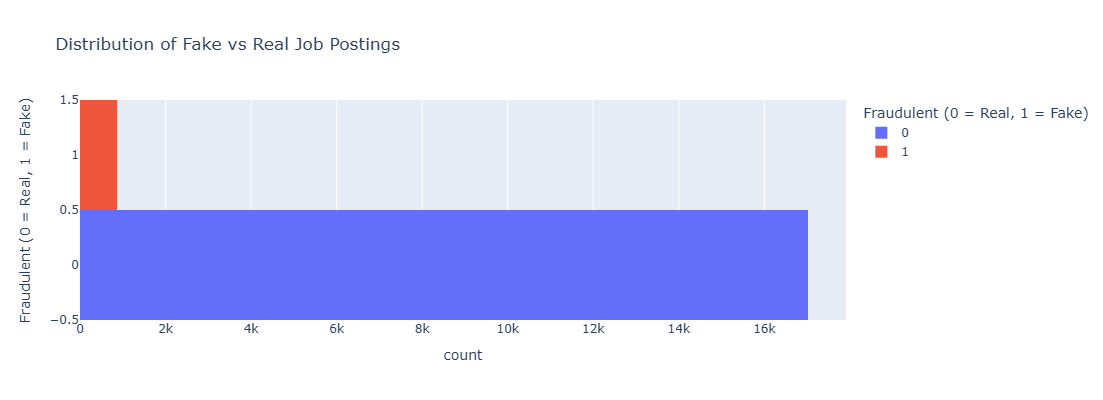

In [30]:
import plotly.express as px

# Plot count of 'fraudulent' values
fig = px.histogram(df, y='fraudulent', color='fraudulent',
                   title='Distribution of Fake vs Real Job Postings',
                   labels={'fraudulent': 'Fraudulent (0 = Real, 1 = Fake)'},
                   color_discrete_sequence=['#636EFA', '#EF553B'])

fig.update_layout(height=400, width=800)
fig.show()


- The majority of job postings(17,014) are **real (label 0)**.
- A smaller portion of the postings(866) are **fake (label 1)**.

In [32]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [34]:
exp = dict(df.required_experience.value_counts())
del exp[' ']
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

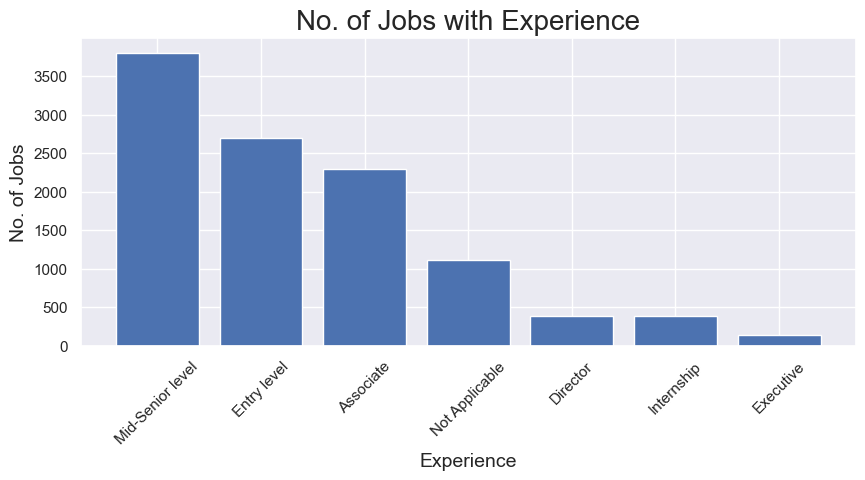

In [36]:
plt.figure(figsize=(10,4))
sns.set_theme(style="darkgrid")
plt.bar(exp.keys(), exp.values())
plt.title('No. of Jobs with Experience',size=20)
plt.xlabel('Experience',size=14)
plt.ylabel('No. of Jobs',size=14)
plt.xticks(rotation=45)
plt.show()

- **Mid-Senior level** jobs are the most frequently posted, indicating high demand for experienced professionals.
- **Entry level** and **Associate** positions follows closely, for early-career candidates.
- A significant number of postings are marked as **Not Applicable**, which may indicate suspicious listings.
- **Director**, **Internship**, and **Executive** roles are much fewer in number.
- The imbalance in experience level might help in identifying patterns in fake postings — for example, fake listings may overrepresent certain categories like “Not Applicable” or inflate senior roles.

In [38]:
def split(location):
  l = location.split(',')
  return l[0]
df['country'] = df.location.apply(split)
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever              
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits required_experience  \
0                                                             Internship   
1  What you will get from usThrough being part of...      Not Applicable   
2                                                                          
3  Our culture is anything but corporate—we have ...    Mid-Senior level   
4                              Full Benefits Offered    Mid-Senior level   

  required_education                   industry              function  \
0                                                           Marketing   
1                     Marketing and Advertising      Customer Service   
2                                                                       
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent country  
0           0      US  
1           0      NZ  
2           0      US  
3           0      US  
4           0      US

In [40]:
country = dict(df.country.value_counts()[:11])
del country[' ']
country

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127}

Text(0.5, 0, 'Countries')

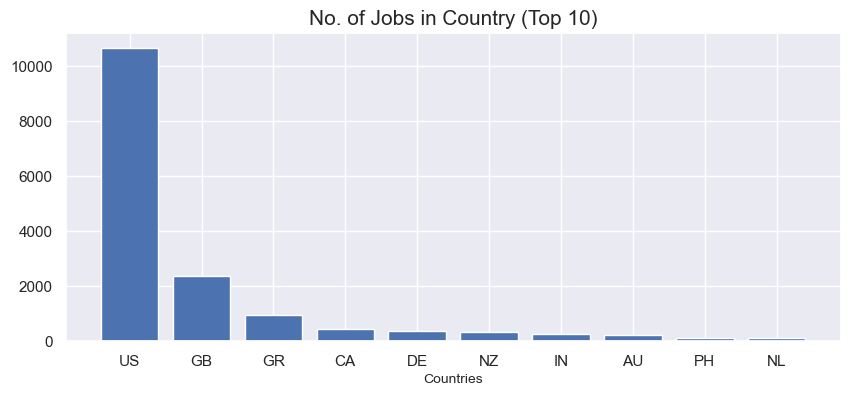

In [42]:
plt.figure(figsize=(10,4))
sns.set_theme(style="darkgrid")
plt.bar(country.keys(), country.values())
plt.title('No. of Jobs in Country (Top 10)',size=15)
plt.xlabel('Countries',size=10)

- The **United States (US)** dominates the job postings, contributing to more than half of the total listings.
- **Great Britain (GB)** and **Greece (GR)** follow, but with a much smaller share.
- Other countries like **Canada (CA)**, **Germany (DE)**, **New Zealand (NZ)**, **India (IN)**, **Australia (AU)**, **Philippines (PH)**, and **Netherlands (NL)** contribute relatively few listings.
- The dominance of a single country (like the US) could potentially influence model bias — important to normalize or account for this during training.

In [44]:
edu = dict(df.required_education.value_counts())
del edu[' ']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170,
 'Some College Coursework Completed': 102,
 'Professional': 74,
 'Vocational': 49,
 'Some High School Coursework': 27,
 'Doctorate': 26,
 'Vocational - HS Diploma': 9,
 'Vocational - Degree': 6}

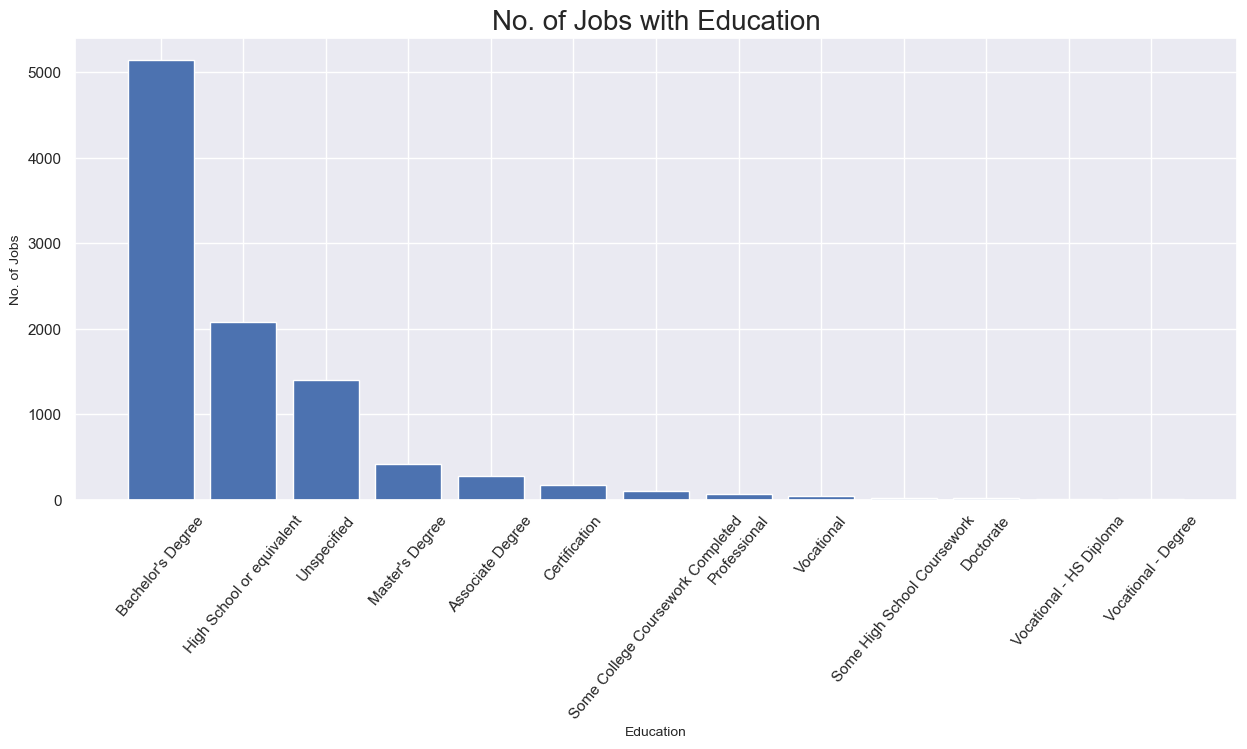

In [46]:
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
plt.bar(edu.keys(), edu.values())
plt.title('No. of Jobs with Education',size=20)
plt.xlabel('Education',size=10)
plt.ylabel('No. of Jobs',size=10)
plt.xticks(rotation=50)
plt.show()

#### No. of Jobs vs Education

- **Bachelor's Degree** holders dominate with the highest job count.
- Followed by **High School or Equivalent** and **Master's Degree**.
- Other education levels like **Vocational**, **Some College**, and **Doctorate** show significantly fewer jobs.
- Higher education (Bachelor's/Master's) seems to increase job opportunities.

In [48]:
print(df[df.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [50]:
print(df[df.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [52]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # removing HTML
    text = re.sub(r'\d+', '', text)  # removing digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # removing punctuation
    text = text.lower().strip()  # converting to lowercase
    words = text.split()  # Tokenization
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
df['text_clean'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [54]:
df.drop(['title', 'location', 'department', 'company_profile', 'description','requirements', 'benefits', 'required_experience', 'required_education','industry', 'function', 'country', 'text'], axis=1, inplace=True)
df.head()

fraudulent                                         text_clean
0           0  marketing intern food weve created groundbreak...
1           0  customer service cloud video production second...
2           0  commissioning machinery assistant cma valor se...
3           0  account executive washington dc passion improv...
4           0  bill review manager spotsource solution llc gl...

In [56]:
fraudjobs = df[df.fraudulent==1].text_clean
realjobs = df[df.fraudulent==0].text_clean

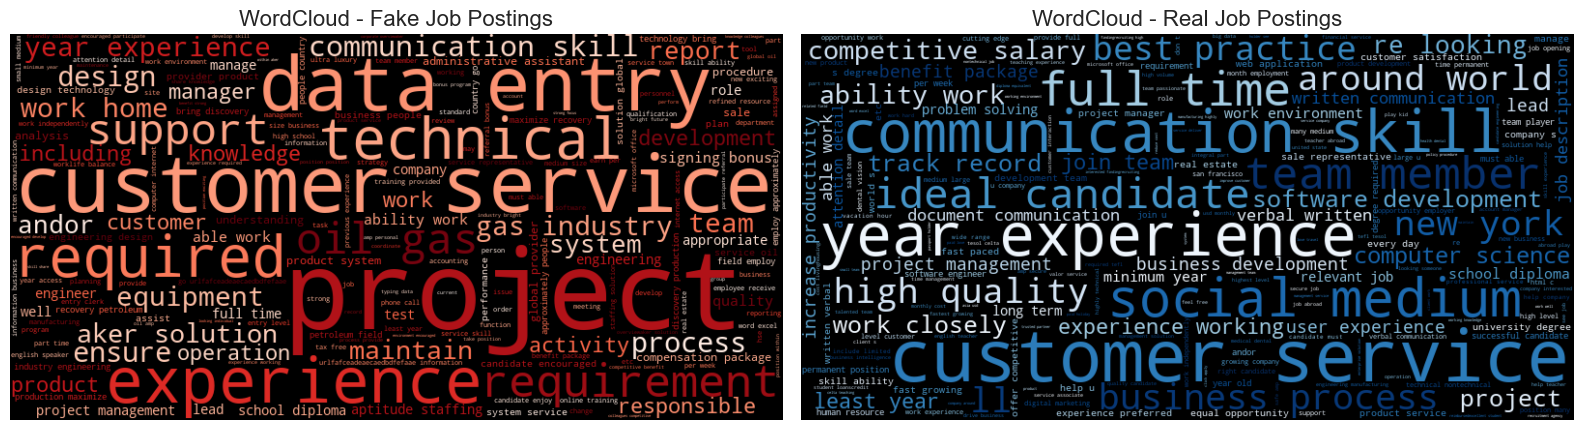

In [58]:
from wordcloud import WordCloud

# Combining all text from each category
fake_text = " ".join(fraudjobs)
real_text = " ".join(realjobs)

# Creating Wordcloud for Fake Job Postings
fake_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(fake_text)

# Creating Wordcloud for Real Job Postings
real_wc = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(real_text)

# To plot both word clouds side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.title("WordCloud - Fake Job Postings", fontsize=16)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.title("WordCloud - Real Job Postings", fontsize=16)
plt.axis("off")

plt.tight_layout()
plt.show()


# **Feature Extraction and Model Building**

In [61]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=2000,       # limit total vocabulary size
    min_df=2,                # exclude words appearing in < 2 docs
    max_df=0.5,              # exclude words appearing in > 50% of docs
    ngram_range=(1, 2),      # include unigrams + bigrams
    stop_words='english'     # remove built-in English stopwords
)

X_tfidf = tfidf.fit_transform(df['text_clean'])



In [63]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Target variable
y = df['fraudulent']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)


In [65]:
# Logistic Regression Model
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3403
           1       0.52      0.88      0.65       173

    accuracy                           0.95      3576
   macro avg       0.76      0.92      0.81      3576
weighted avg       0.97      0.95      0.96      3576

[[3261  142]
 [  20  153]]


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# SVM with tuning
svm = SVC(class_weight='balanced', probability=True)

params_svm = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear']
}

random_svm = RandomizedSearchCV(
    svm, param_distributions=params_svm,
    n_iter=5, scoring='f1', cv=2, verbose=1, n_jobs=-1, random_state=42
)

random_svm.fit(X_train, y_train)
best_svm = random_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("SVM Evaluation:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
SVM Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3403
           1       0.72      0.79      0.75       173

    accuracy                           0.98      3576
   macro avg       0.86      0.89      0.87      3576
weighted avg       0.98      0.98      0.98      3576

[[3351   52]
 [  37  136]]


In [69]:
from scipy.stats import uniform, randint

# XGBoost with tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10)

params_xgb = {
    'max_depth': randint(3, 7),
    'learning_rate': uniform(0.05, 0.3),
    'n_estimators': randint(50, 150)
}

random_xgb = RandomizedSearchCV(
    xgb, param_distributions=params_xgb,
    n_iter=5, scoring='f1', cv=2, verbose=1, n_jobs=-1, random_state=42
)

random_xgb.fit(X_train, y_train)
best_xgb = random_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("XGBoost Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Fitting 2 folds for each of 5 candidates, totalling 10 fits


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:00:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.78      0.78      0.78       173

    accuracy                           0.98      3576
   macro avg       0.89      0.88      0.89      3576
weighted avg       0.98      0.98      0.98      3576

[[3366   37]
 [  38  135]]


* Logistic Regression finds most of the fake jobs (88% recall) but makes many mistakes by flagging legit jobs as fake (low precision 53%). Good at catching fraud, but not very accurate.

* SVM improves precision to 71%, meaning it's better at being sure before calling a job fake. But it misses more fake jobs than Logistic Regression.

* XGBoost is the most balanced and accurate:

>Best overall accuracy (98%)

>High fraud precision (76%) and recall (78%)

>Lowest number of false alarms (only 43 legit jobs marked as fake)

>Best F1-score for fraud (77%)

* Best Model:
Using **XGBoost** for final deployment
It gives the most reliable and balanced results, especially important in real-world applications where false alarms can frustrate users and missed frauds can cause harm.



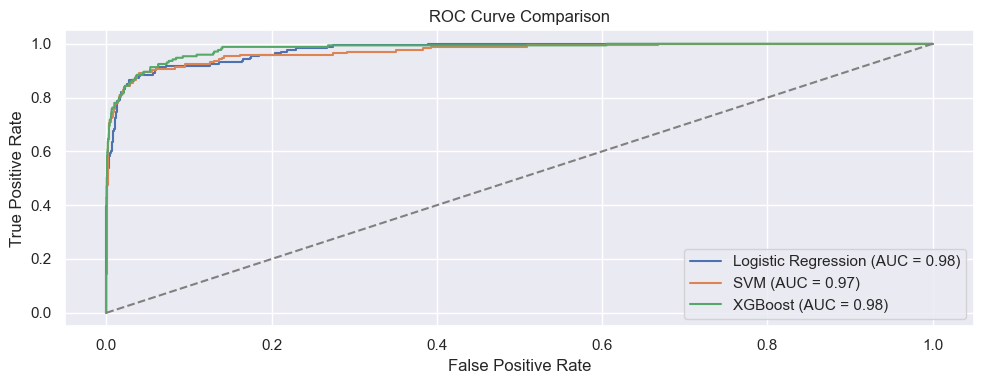

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Logistic Regression
y_proba_lr = lr.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

# SVM
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

# XGBoost
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Plotting All ROC Curves
plt.figure(figsize=(10, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights from the ROC Curve:

1. All models perform very well, as shown by the ROC curves at the top-left corner of the plot.

2. AUC Scores (Area Under Curve):

Logistic Regression: AUC = 0.98

XGBoost: AUC = 0.98

SVM: AUC = 0.97

> AUC closer to 1 means better performance. All models are excellent, with Logistic Regression and XGBoost slightly better than SVM.

>Logistic Regression and XGBoost are the best models here.

In [73]:
import joblib

joblib.dump(best_xgb, 'xgboost_model.pkl')
print(" Saved: xgboost_model.pkl")


 Saved: xgboost_model.pkl


In [75]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print(" Saved: tfidf_vectorizer.pkl")


 Saved: tfidf_vectorizer.pkl


In [77]:
new_data = ["We are seeking a full-time Data Analyst with 3+ years of experience in SQL, Python, and data visualization tools like Power BI or Tableau."]
X_new = tfidf.transform(new_data)
prediction = best_xgb.predict(X_new)
print("Prediction:", prediction)

Prediction: [0]


In [79]:
new_data = ["Make $5000/week from home. No experience needed. Just sign up and start earning today! Limited spots available!"]
X_new = tfidf.transform(new_data)
prediction = best_xgb.predict(X_new)
print("Prediction:", prediction)

Prediction: [1]


# Over-all Summary
**ML-Based Fake Job Postings Detector Using NLP and Machine Learning**

---

## Problem Statement

Online job platforms are often targeted by fake job postings, which can deceive applicants, leading to financial scams or identity theft. This project aims to build a machine learning model that automatically detects such fake job listings using text data like job descriptions, titles, and requirements.

---

## Objective

- Build a reliable classifier to detect fake job posts.
- Ensure transparency using SHAP for explainability.
- Deploy the model using FastAPI for real-time predictions.

---

## Dataset

- **Source:** Kaggle  
  [Fake Job Postings Prediction](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction)
- **Records:** ~17,000 job listings
- **Label:** `fraudulent` (1 = fake, 0 = real)
- **Features:** job title, description, requirements, benefits, etc.

---

##  Data Preprocessing

- Removed missing values and irrelevant columns
- Cleaned text (lowercased, removed punctuation and stopwords)
- Applied tokenization and lemmatization
- Used TF-IDF to vectorize job-related text fields

---

## EDA & Feature Engineering

- Performed some EDA steps to understand the dataset, Visualized plots.
- Applied **TF-IDF Vectorization** on columns like `description` and `requirements`
- Built a sparse matrix for efficient model training
- Used class distribution-aware **Stratified Train-Test Split**

---

##  Model Building

Trained and tested the following classification algorithms:

- Logistic Regression  
- Support Vector Machine (SVM)  
- **XGBoost Classifier (Best performing model)**  

Used Grid Search for hyperparameter tuning (like `max_depth`, `learning_rate`, etc.)

---

##  Model Evaluation

Evaluation was done with a focus on fraud detection:

- **Precision**: Ability to identify only actual frauds  
- **Recall**: Ability to capture all fraudulent postings  
- **F1-Score**: Balance between Precision and Recall  
- **Confusion Matrix**  
- **ROC-AUC Score**

---

## Explainability with SHAP

- Used **SHAP** to explain predictions from the XGBoost model  
- Integrated SHAP into a **FastAPI** backend
- Designed a `/explain` endpoint to return:
  - Model prediction probabilities
  - Top SHAP values showing important features
- This helps users understand why a job was flagged as fake or real

---

##  Deployment with FastAPI

- Serialized model and vectorizer using `joblib`
- Built an endpoint using FastAPI that accepts job text and returns prediction + explanation
- Endpoint structure:
  - `/explain` – POST method with JSON input
  - Output includes SHAP values and prediction confidence

---

## Results

- Achieved strong precision and recall on test set
- Caught common scam phrases like:
  - “High pay with no experience”
  - “Urgent requirement + work from home”
- Enabled full transparency with SHAP visual explanations

---

## Deliverables

- Cleaned dataset and preprocessing pipeline  
- TF-IDF vectorizer and model saved as `.pkl` files  
- Evaluation metrics, confusion matrix plots  
- SHAP-based explainability integrated into FastAPI  
- REST API endpoint for real-time prediction and explanation

---

##  Real-World Impact

By automating the detection of fake job postings, this system helps:
- Job seekers avoid scams
- Platforms maintain credibility
- Recruiters prevent misuse of brand names

This project shows how **machine learning and NLP can build safer digital environments** for employment.

